## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from wild_time_data import available_time_steps
from wild_time_data import load_dataset, num_outputs
import random
random.seed(21100)

In [2]:
list_labels = ('airport', 'airport hangar', 'airport terminal', 'amusement park', 'aquaculture', 'archaeological site', 'barn', 
                   'border checkpoint', 'burial site', 'car dealership', 'construction site', 'crop field', 'dam', 'debris/rubble', 
                   'educational institution', 'electric substation', 'factory/powerplant', 'fire station', 'flooded road', 'fountain', 
                   'gas station', 'golf course', 'ground transportation station', 'helipad', 'hospital', 'impoverished settlement', 
                   'interchange', 'lake/pond', 'lighthouse', 'military facility', 'multi-unit residential', 'nuclear powerplant', 
                   'office building', 'oil/gas facility', 'park', 'parking lot/garage', 'place of worship', 'police station', 'port', 
                   'prison', 'race track', 'railway bridge', 'recreational facility', 'road bridge', 'runway', 'shipyard', 'shopping mall', 
                   'single-unit residential', 'smokestack', 'solar farm', 'space facility', 'stadium', 'storage tank', 'surface mine', 
                   'swimming pool', 'toll booth', 'tower', 'tunnel opening', 'waste disposal', 'water treatment facility', 'wind farm', 'zoo')
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

## Work with fmow

In [15]:
print(available_time_steps("fmow"))
final_length = 0
for i in range(6,16):
    data=load_dataset(dataset_name="fmow", split="train", time_step=i, data_dir=r"Dataset", transform=lambda x :x)
    print(data.size)
    final_length += data.size
print(final_length)
for i in range(10):
    print(data[i][1].item())
print(data[0][0].shape)
# images are of class numpy.ndarray with shape (224, 224, 3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2261
7439
18957
22111
24704
3465
5572
8885
14363
5534
113291
21
17
16
18
29
58
47
33
57
53
(224, 224, 3)


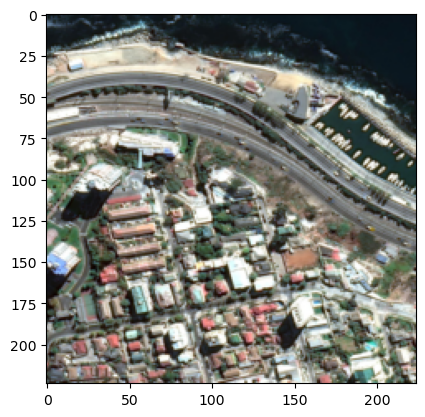

educational institution


In [37]:
rand_img = random.randrange(data.size)

img = data[rand_img][0]
plt.imshow(img.astype('uint8'))
plt.show()
print(labels[data[rand_img][1].item()])

In [12]:
chosen_year = 2012
data = load_dataset(dataset_name="fmow", split="train", time_step=chosen_year-2002, data_dir=r"Wild-Time-Data\converter", transform=lambda x :x)
num_output = num_outputs('fmow')
vec = [[] for _ in range(num_output)]
lab = [[] for _ in range(num_output)]

for i in range(num_output):
    matrices_to_append = []
    lab_to_append = []
    for j in range(data.size):
        if(data[j][1].item()==i):
            matrices_to_append.append(data[j][0])
            lab_to_append.append(data[j][1].item())
    vec[i].append(matrices_to_append)
    lab[i].append(lab_to_append)
# We divide images by their label in a chosen year (can be done on whole dataset)
print(data.size)

5534


In [ ]:
for k in range(num_output):
    if(len(lab[k][0])>0):
        img = vec[k][0][0]
        plt.imshow(img.astype('uint8'))
        plt.show()
        print(labels[lab[k][0][0]])

# Plot one image per each label

In [ ]:
label = 61
if(len(lab[label][0])>0):
        index = len(lab[label][0])
        for k in range(index):
            img = vec[label][0][k]
            plt.imshow(img.astype('uint8'))
            plt.show()
            print(labels[lab[label][0][k]])

# Plot all images for a given label

## Searching for metadata

In [45]:
from PIL import Image
for i in range(500):
    img = Image.open(r"Wild-Time-Data\converter\fmow_v1.1\images\rgb_img_"+str(i)+".png")
    img.load()  # Needed only for .png EXIF data
    if img.info!={}:
        print(img.info) #['meta_to_read']

Processing images

In [3]:
data = []
size = []
for i in available_time_steps("fmow"):
    data.append(load_dataset(dataset_name="fmow", split="train", time_step=i, data_dir=r"Dataset", transform=lambda x :x))
    size.append(data[i].size)
    #data[i] + load_dataset(dataset_name="fmow", split="test", time_step=i, data_dir=r"Feature Extraction\Wild-Time-Data\converter", transform=lambda x :x)
print(size)

[1676, 2279, 1755, 2512, 3155, 1497, 2261, 7439, 18957, 22111, 24704, 3465, 5572, 8885, 14363, 5534]


In [7]:
from collections import defaultdict

# Step 1: Find all unique labels in the dataset across all years
all_labels = set()
for year_data in data:
    for sample in year_data:
        all_labels.add(sample[1].item())  # Collecting the label

all_labels = sorted(all_labels)  # Sort labels alphabetically (or numerically if applicable)

# Step 2: Create the list of lists (data) to hold the count of samples per label per year
label_counts_per_year = []

for year_data in data:
    # Initialize a dictionary to count samples per label for this year
    label_count = defaultdict(int)
    
    # Count occurrences of each label in this year
    for sample in year_data:
        label = sample[1].item()
        label_count[label] += 1
    
    # Create a list for this year where each entry is the count of a label in `all_labels`
    counts_for_this_year = [label_count[label] for label in all_labels]
    label_counts_per_year.append(counts_for_this_year)

# Step 3: Transpose the result to have labels as rows and years as columns
data = np.array(label_counts_per_year).T  # Transpose the list

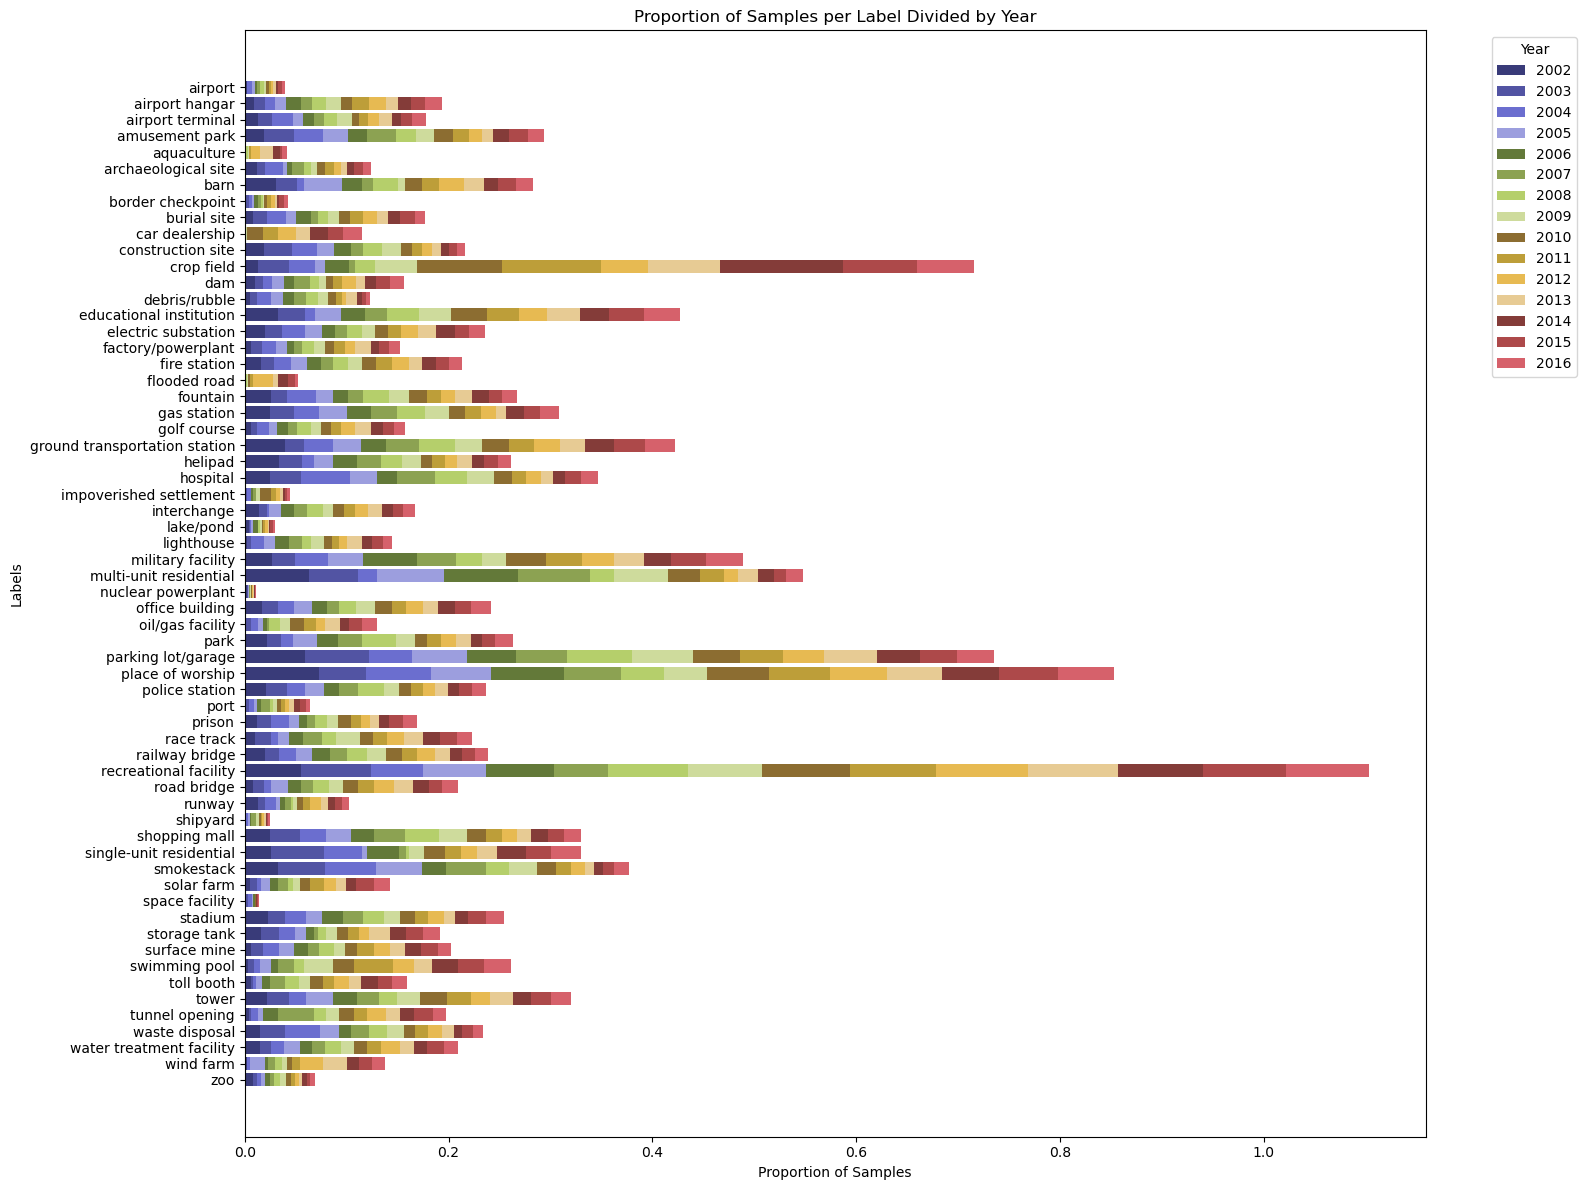

In [8]:
years = range(2002, 2017)  # List of years
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

# Convert the data into a NumPy array for easy manipulation
data = np.array(data)

size = np.array(size)

# Number of categories (labels)
num_labels = len(labels)

# Create an array of indices for the x-axis (one for each category)
y = np.arange(num_labels)

proportions = data / size

# Colors for each year
colors = plt.colormaps['tab20b'].colors[:len(years)]  # Get distinct colors for years

# Initialize a figure
fig, ax = plt.subplots(figsize=(16, 12))

# Plot each year's data as a stacked bar
for i in range(len(years)):
    if i == 0:
        # Plot the base of the bar (first year)
        ax.barh(y, proportions[:, i], color=colors[i], label=str(years[i]))
    else:
        # Add subsequent years on top
        ax.barh(y, proportions[:, i], left=np.sum(proportions[:, :i], axis=1), color=colors[i], label=str(years[i]))

# Set x-ticks to show the category labels
ax.set_yticks(y)
ax.set_yticklabels(labels.values())

# Add labels and title
ax.invert_yaxis()
ax.set_ylabel('Labels')
ax.set_xlabel('Proportion of Samples')
ax.set_title('Proportion of Samples per Label Divided by Year')

ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

plt.tight_layout()

# Show plot
plt.show()

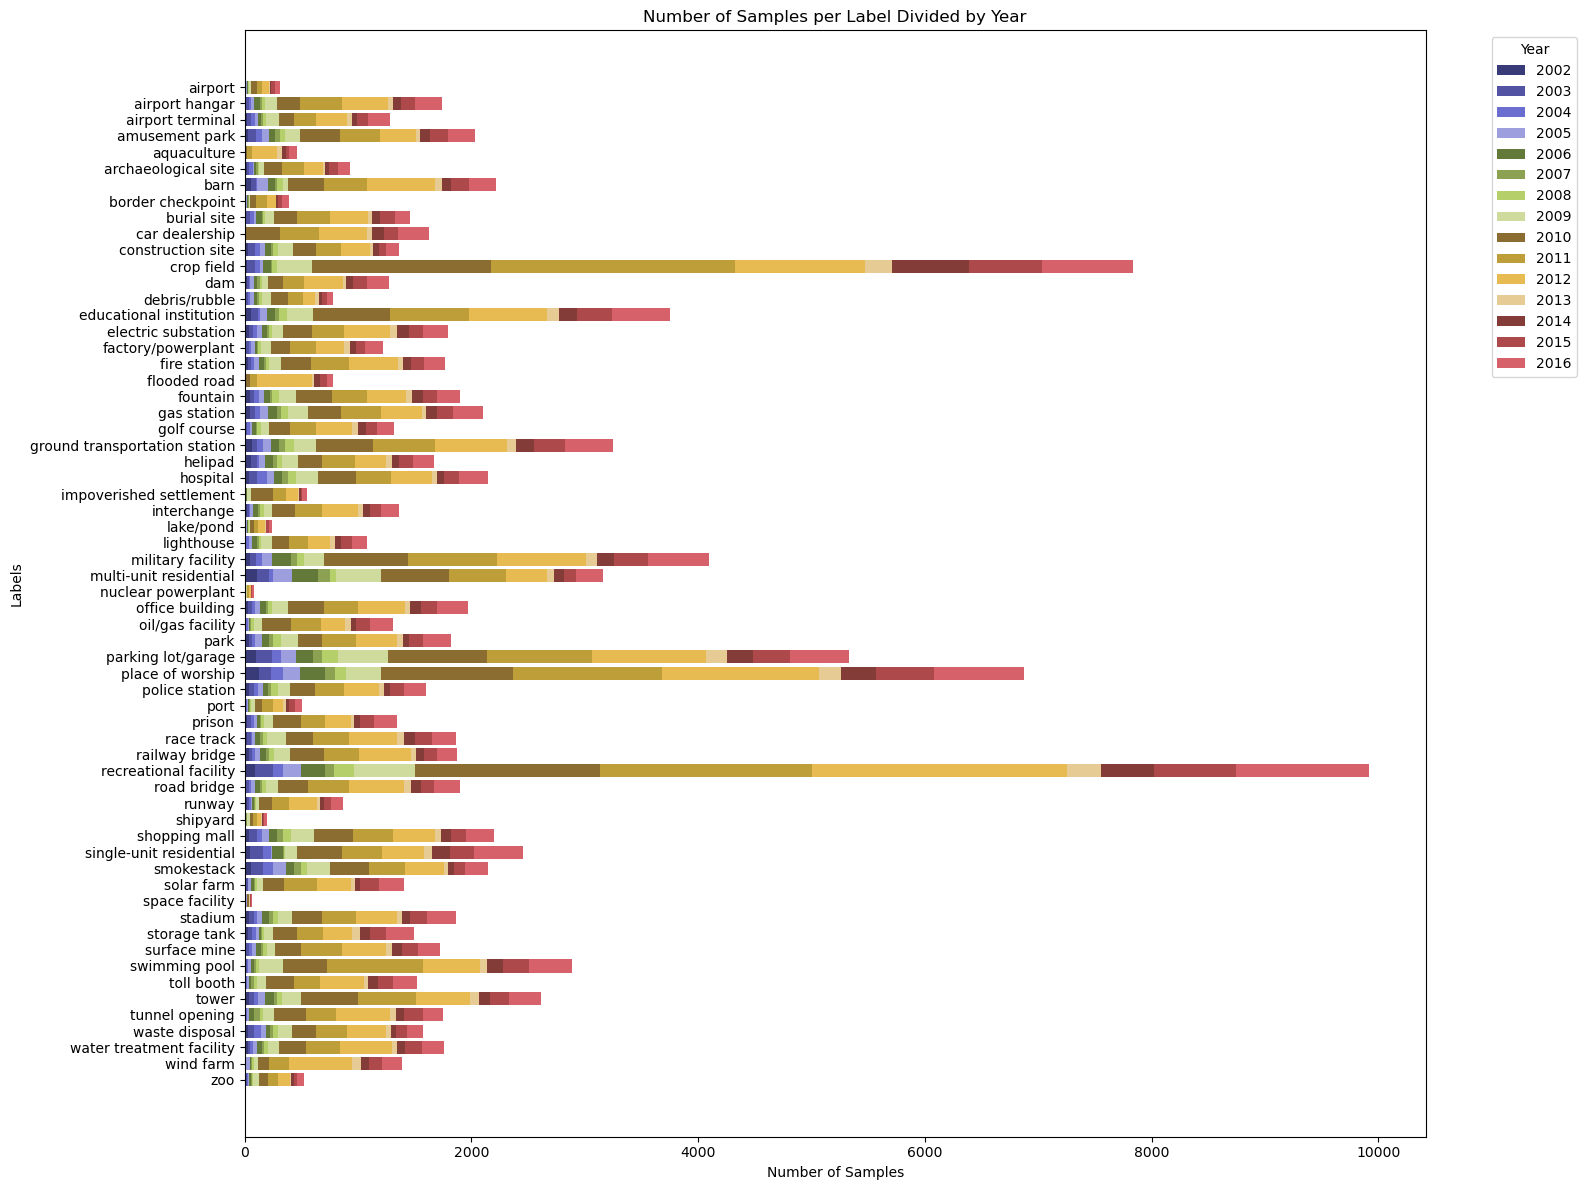

In [9]:
years = range(2002, 2017)  # List of years
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

# Convert the data into a NumPy array for easy manipulation
data = np.array(data)

# Number of categories (labels)
num_labels = len(labels)

# Create an array of indices for the x-axis (one for each category)
y = np.arange(num_labels)

# Colors for each year
colors = plt.colormaps['tab20b'].colors[:len(years)]  # Get distinct colors for years

# Initialize a figure
fig, ax = plt.subplots(figsize=(16, 12))

# Plot each year's data as a stacked bar
for i in range(len(years)):
    if i == 0:
        # Plot the base of the bar (first year)
        ax.barh(y, data[:, i], color=colors[i], label=str(years[i]))
    else:
        # Add subsequent years on top
        ax.barh(y, data[:, i], left=np.sum(data[:, :i], axis=1), color=colors[i], label=str(years[i]))

# Set x-ticks to show the category labels
ax.set_yticks(y)
ax.set_yticklabels(labels.values())

# Add labels and title
ax.invert_yaxis()
ax.set_ylabel('Labels')
ax.set_xlabel('Number of Samples')
ax.set_title('Number of Samples per Label Divided by Year')

ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

plt.tight_layout()

# Show plot
plt.show()

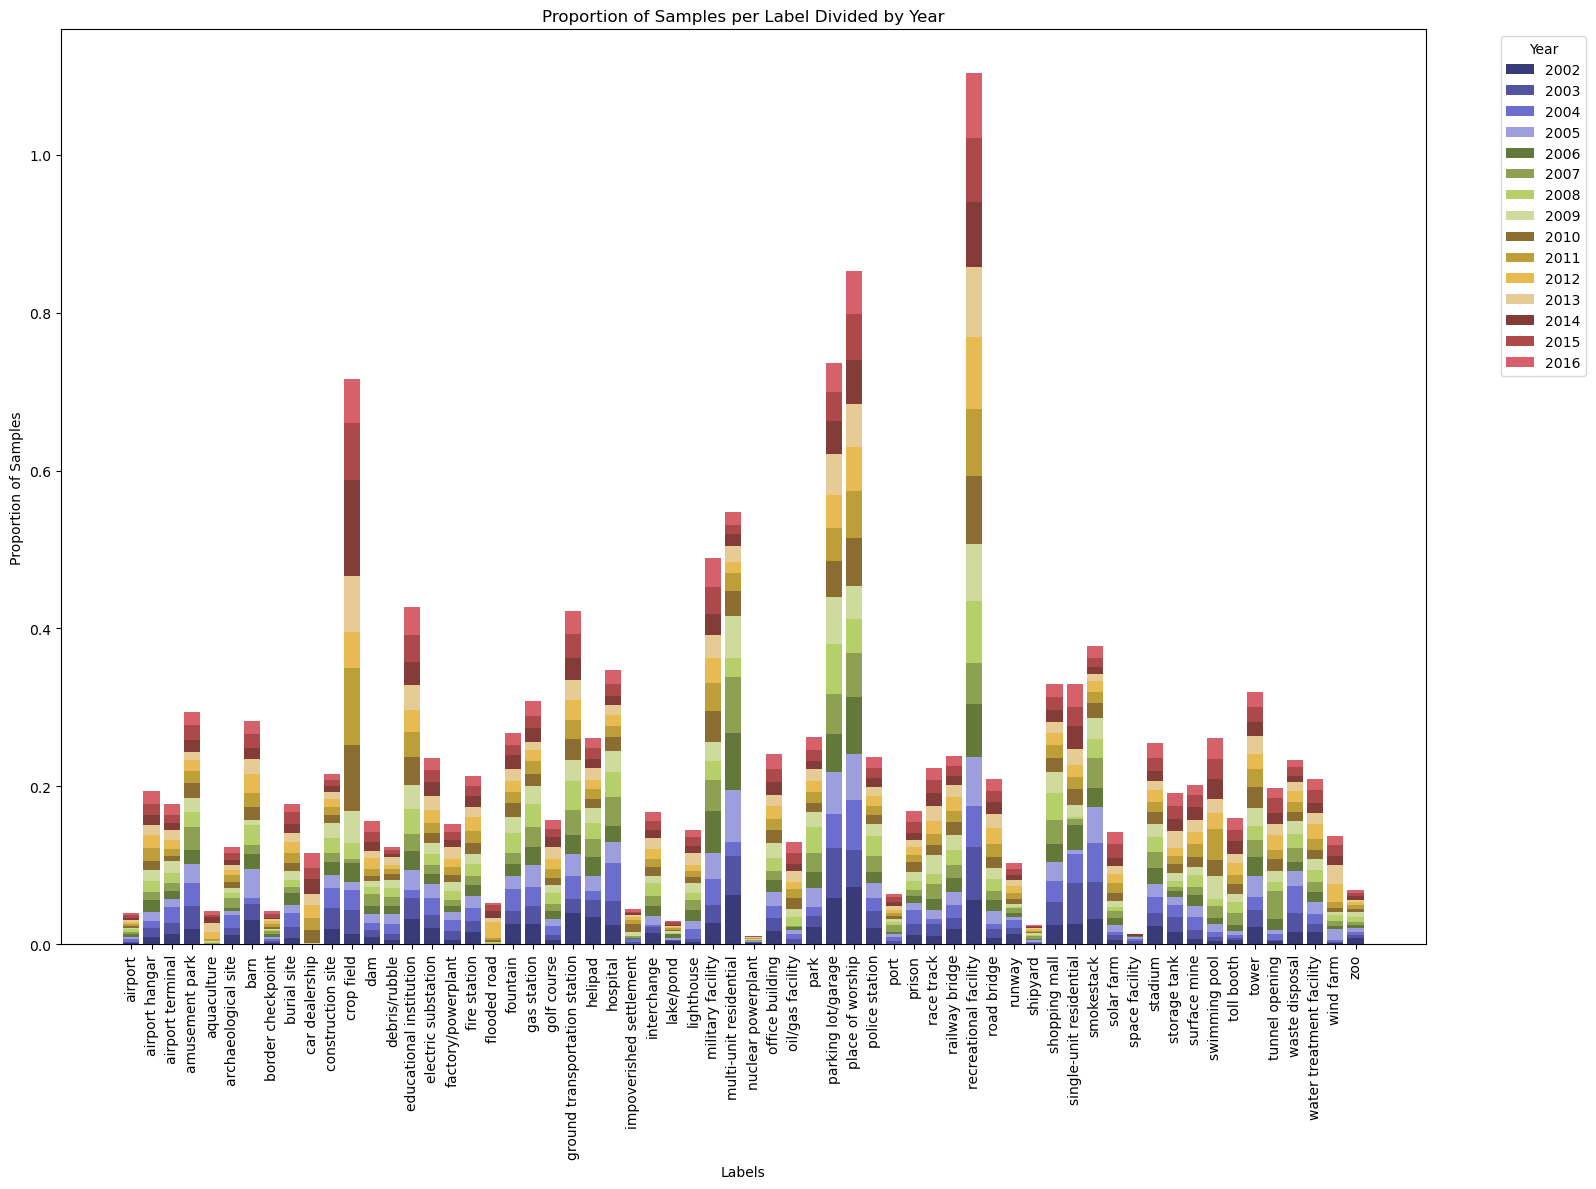

In [10]:
years = range(2002, 2017)  # List of years
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

# Convert the data into a NumPy array for easy manipulation
data = np.array(data)

size = np.array(size)

proportions = data / size

# Number of categories (labels)
num_labels = len(labels)

# Create an array of indices for the x-axis (one for each category)
x = np.arange(num_labels)

# Colors for each year
colors = plt.colormaps['tab20b'].colors[:len(years)]  # Get distinct colors for years

# Initialize a figure
fig, ax = plt.subplots(figsize=(16, 12))

# Plot each year's data as a stacked bar
for i in range(len(years)):
    if i == 0:
        # Plot the base of the bar (first year)
        ax.bar(x, proportions[:, i], color=colors[i], label=str(years[i]))
    else:
        # Add subsequent years on top
        ax.bar(x, proportions[:, i], bottom=np.sum(proportions[:, :i], axis=1), color=colors[i], label=str(years[i]))

# Set x-ticks to show the category labels
ax.set_xticks(x)
ax.set_xticklabels(labels.values(), rotation=90)

# Add labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Proportion of Samples')
ax.set_title('Proportion of Samples per Label Divided by Year')

ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

plt.tight_layout()

# Show plot
plt.show()

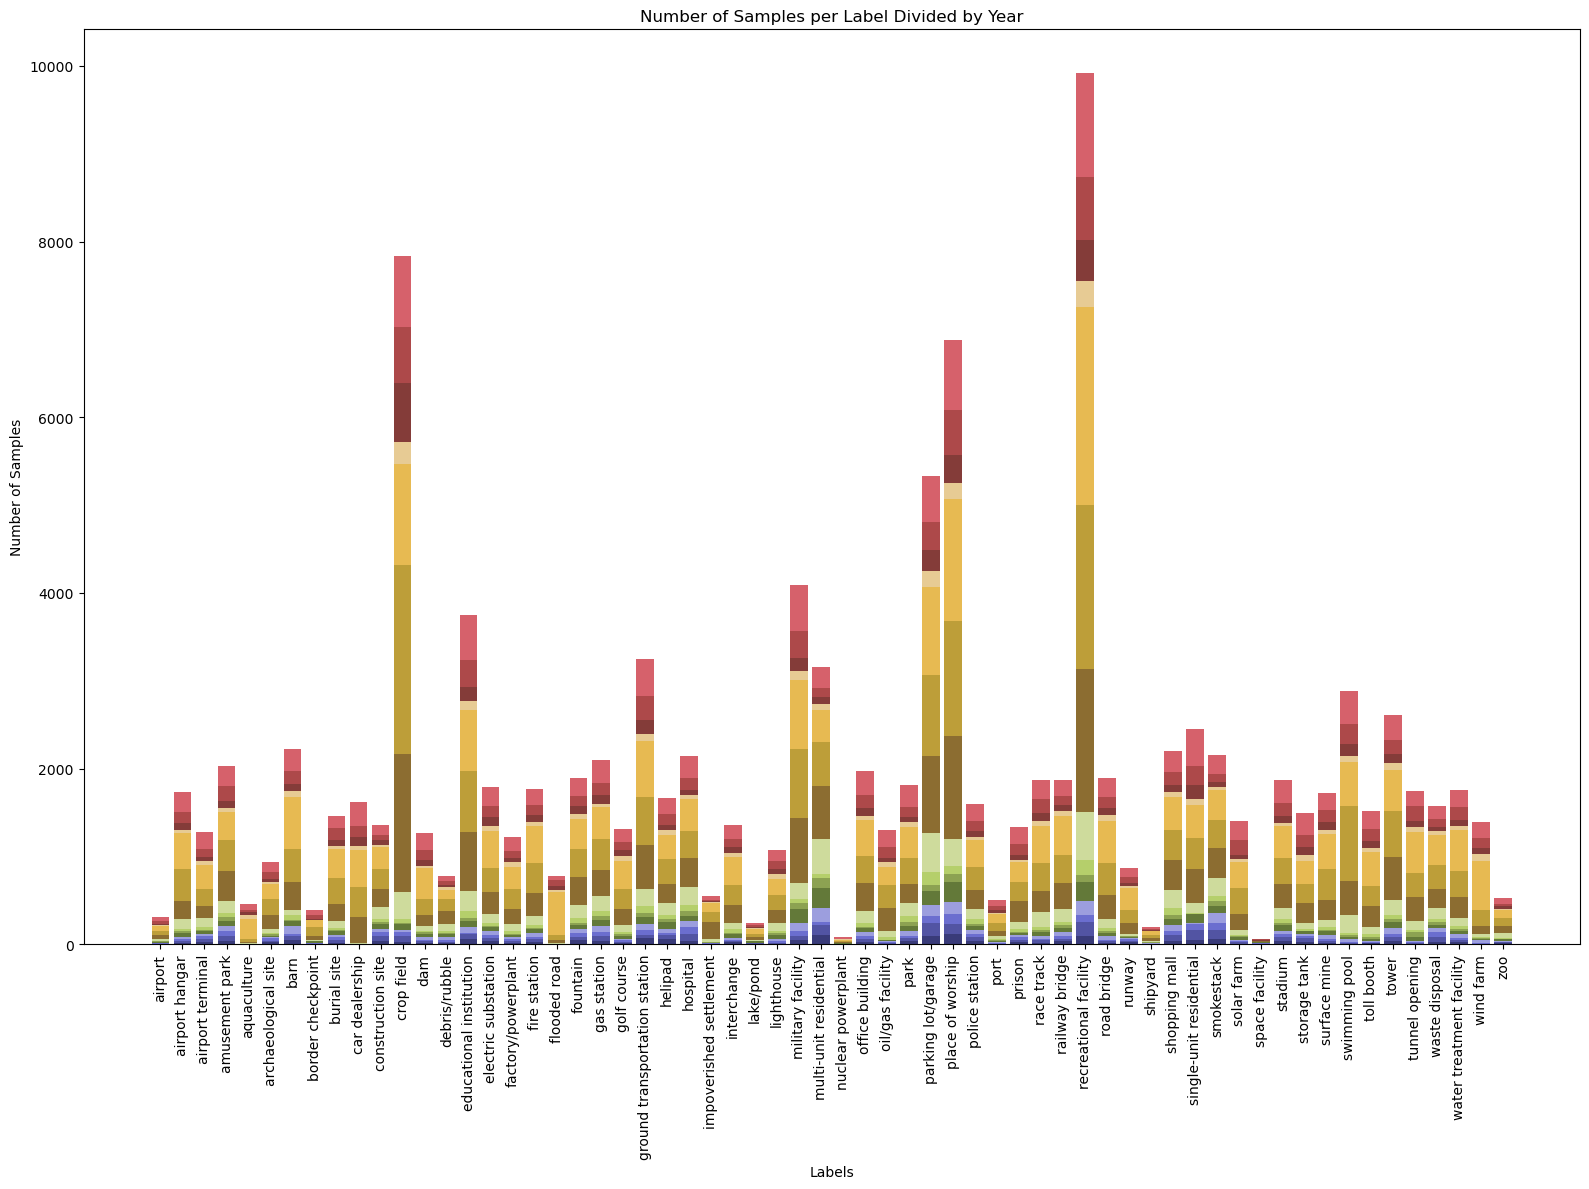

In [11]:
years = range(2002, 2017)  # List of years
labels = {}
for i, name in enumerate(list_labels):
    labels[i] = name

# Convert the data into a NumPy array for easy manipulation
data = np.array(data)

# Number of categories (labels)
num_labels = len(labels)

# Create an array of indices for the x-axis (one for each category)
x = np.arange(num_labels)

# Colors for each year
colors = plt.colormaps['tab20b'].colors[:len(years)]  # Get distinct colors for years

# Initialize a figure
fig, ax = plt.subplots(figsize=(16, 12))

# Plot each year's data as a stacked bar
for i in range(len(years)):
    if i == 0:
        # Plot the base of the bar (first year)
        ax.bar(x, data[:, i], color=colors[i], label=str(years[i]))
    else:
        # Add subsequent years on top
        ax.bar(x, data[:, i], bottom=np.sum(data[:, :i], axis=1), color=colors[i], label=str(years[i]))

# Set x-ticks to show the category labels
ax.set_xticks(x)
ax.set_xticklabels(labels.values(), rotation=90)

# Add labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples per Label Divided by Year')

#ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

plt.tight_layout()

# Show plot
plt.show()

In [12]:
np.sum(data, axis=1)

array([  378,  1761,  1314,  2169,   479,   983,  2290,   415,  1485,
        1633,  1442,  8075,  1288,   792,  3979,  1904,  1318,  1870,
         813,  2014,  2146,  1365,  3448,  1683,  2201,   592,  1403,
         245,  1118,  4400,  3388,    79,  2066,  1354,  1836,  5383,
        7157,  1713,   555,  1431,  1933,  1883, 10210,  1926,   913,
         219,  2239,  2908,  2220,  1462,    77,  1952,  1581,  1803,
        2998,  1629,  2703,  1976,  1624,  1819,  1571,   554])